In [6]:
#write name team with tabulate
from tabulate import tabulate

member_name = [

    ["HENG SEAKLONG", "Male", "Y3-AMS", "e20210329"],
    ["CHOUV YOY Y", "Female", "Y3-AMS", "e20211464"],
    ["Dok Dominique", "Female", "Y3-AMS", "e20210337"],
    ["CHORN MENGHORT", "Male", "Y3-AMS", "e2021***"],
    ["ENG SIVEU", "Male", "Y3-AMS", "e2021***"],
]
member_info = ["Name", "Gender", "Program", "ID"]
print("Group 3:")
print(tabulate(member_name, headers=member_info, tablefmt="fancy_grid"))


Group 3:
╒════════════════╤══════════╤═══════════╤═══════════╕
│ Name           │ Gender   │ Program   │ ID        │
╞════════════════╪══════════╪═══════════╪═══════════╡
│ HENG SEAKLONG  │ Male     │ Y3-AMS    │ e20210329 │
├────────────────┼──────────┼───────────┼───────────┤
│ CHOUV YOY Y    │ Female   │ Y3-AMS    │ e20211464 │
├────────────────┼──────────┼───────────┼───────────┤
│ Dok Dominique  │ Female   │ Y3-AMS    │ e20210337 │
├────────────────┼──────────┼───────────┼───────────┤
│ CHORN MENGHORT │ Male     │ Y3-AMS    │ e2021***  │
├────────────────┼──────────┼───────────┼───────────┤
│ ENG SIVEU      │ Male     │ Y3-AMS    │ e2021***  │
╘════════════════╧══════════╧═══════════╧═══════════╛


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

### Loading Dataset using API

In [1]:
from ucimlrepo import fetch_ucirepo  # type: ignore
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

### Exploretory Data Analysis

In [2]:
#print data
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [3]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [4]:
X.shape

(398, 7)

In [7]:
#merge x and y 
df = X.join(y)
print(tabulate(df.head(), headers=df.columns, tablefmt="fancy_grid"))

╒════╤════════════════╤═════════════╤══════════════╤══════════╤════════════════╤══════════════╤══════════╤═══════╕
│    │   displacement │   cylinders │   horsepower │   weight │   acceleration │   model_year │   origin │   mpg │
╞════╪════════════════╪═════════════╪══════════════╪══════════╪════════════════╪══════════════╪══════════╪═══════╡
│  0 │            307 │           8 │          130 │     3504 │           12   │           70 │        1 │    18 │
├────┼────────────────┼─────────────┼──────────────┼──────────┼────────────────┼──────────────┼──────────┼───────┤
│  1 │            350 │           8 │          165 │     3693 │           11.5 │           70 │        1 │    15 │
├────┼────────────────┼─────────────┼──────────────┼──────────┼────────────────┼──────────────┼──────────┼───────┤
│  2 │            318 │           8 │          150 │     3436 │           11   │           70 │        1 │    18 │
├────┼────────────────┼─────────────┼──────────────┼──────────┼────────────────┼

In [8]:
#save to csv
df.to_csv("auto_mpg.csv", index=False)


In [10]:
df.isnull().sum()

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

In [11]:
#replace mean to missing value
df['horsepower'] = df['horsepower'].replace('?', np.nan)

In [12]:
#replace mean to missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())


In [13]:
#convert to float
df['horsepower'] = df['horsepower'].astype(float)

In [14]:
df.isnull().sum()

displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

In [15]:

print(tabulate(df.describe() , headers=df.columns, tablefmt="fancy_grid"))

╒═══════╤════════════════╤═════════════╤══════════════╤══════════╤════════════════╤══════════════╤════════════╤═══════════╕
│       │   displacement │   cylinders │   horsepower │   weight │   acceleration │   model_year │     origin │       mpg │
╞═══════╪════════════════╪═════════════╪══════════════╪══════════╪════════════════╪══════════════╪════════════╪═══════════╡
│ count │        398     │   398       │     398      │  398     │      398       │    398       │ 398        │ 398       │
├───────┼────────────────┼─────────────┼──────────────┼──────────┼────────────────┼──────────────┼────────────┼───────────┤
│ mean  │        193.426 │     5.45477 │     104.469  │ 2970.42  │       15.5681  │     76.0101  │   1.57286  │  23.5146  │
├───────┼────────────────┼─────────────┼──────────────┼──────────┼────────────────┼──────────────┼────────────┼───────────┤
│ std   │        104.27  │     1.701   │      38.1992 │  846.842 │        2.75769 │      3.69763 │   0.802055 │   7.81598 │
├───────

In [16]:
col_cat = [
    'cylinders',
    'origin',
]
col_num = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]

### Univariate Analysis

In [17]:

for col in col_cat:
    # Create a pivot table for the current column
    pivot_df = df.pivot_table(index=col, aggfunc='size', fill_value=0)
    
    # Plotting
    fig = go.Figure(go.Bar(x=pivot_df.index, y=pivot_df.values))
    fig.update_layout(title=f'Bar Graph of {col}', xaxis_title=col, yaxis_title='Count')
    fig.update_layout(
    autosize=False,
    width=700,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)
    fig.show()


In [18]:


for col in col_num:
    fig = ff.create_distplot([df[col]], [col], bin_size=0.5, show_rug=False)
    fig.update_layout(title=f'Histogram of {col}', autosize=False, width=700, height=500,
                      margin=dict(l=50, r=50, b=100, t=100, pad=4))
    fig.show()


### Bivariate Analysis

<Figure size 800x800 with 0 Axes>

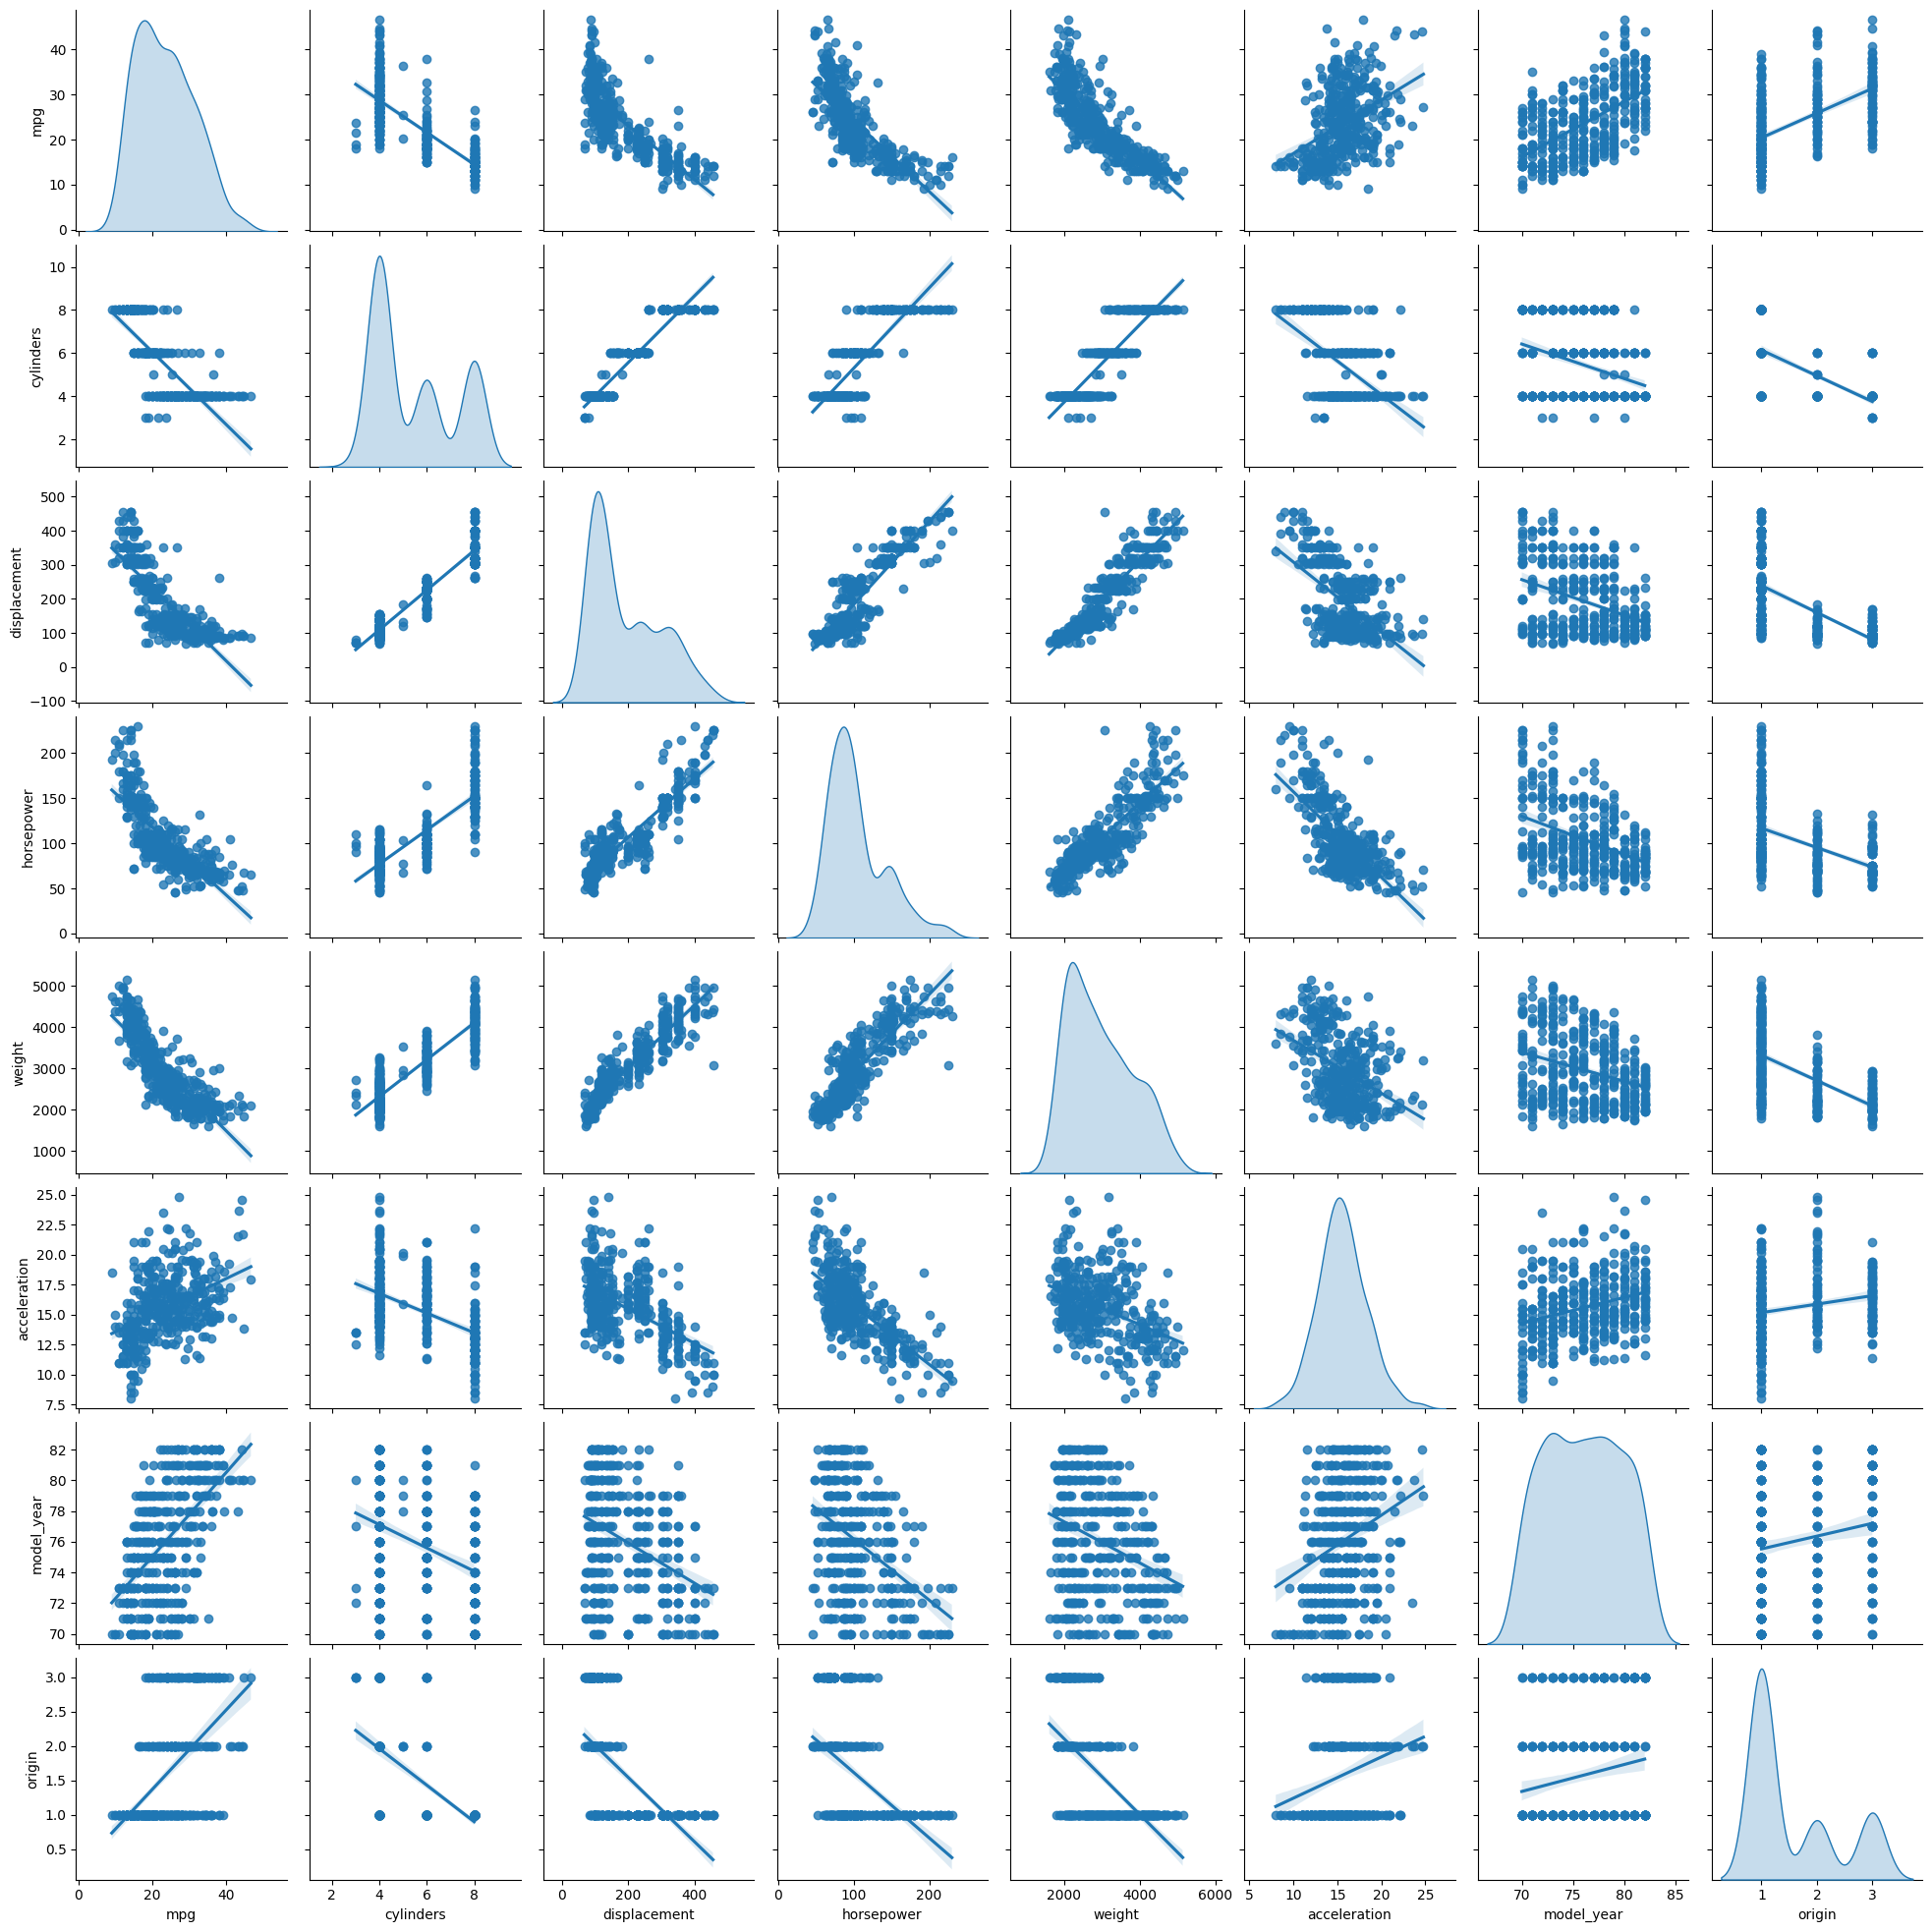

In [19]:
#plot pairplot with kde regreesion
figure = plt.figure(figsize=(8, 8))
sns.pairplot(data=df[col_num], diag_kind='kde', kind='reg')

In [20]:


fig = px.imshow(df[col_num].corr(), zmin=-1, zmax=1)  # Setting zmin and zmax to show correlation values ranging from -1 to 1
fig.update_layout(
    autosize=False,
    width=700,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)
fig.update_traces(colorbar=dict(title="Correlation"))  # Adding color bar title

# Adding correlation values as annotations
annotations = []
for i, row in enumerate(df[col_num].corr().values):
    for j, value in enumerate(row):
        annotations.append(dict(text=str(round(value, 2)),
                                x=j,
                                y=i,
                                xref='x1',
                                yref='y1',
                                showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()


### Multivariate Analysis

<Axes: xlabel='model_year', ylabel='count'>

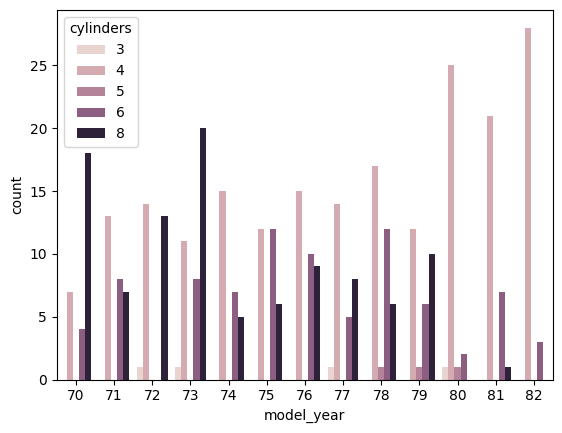

In [21]:
sns.countplot(data = df , x = "model_year" , hue = "cylinders")

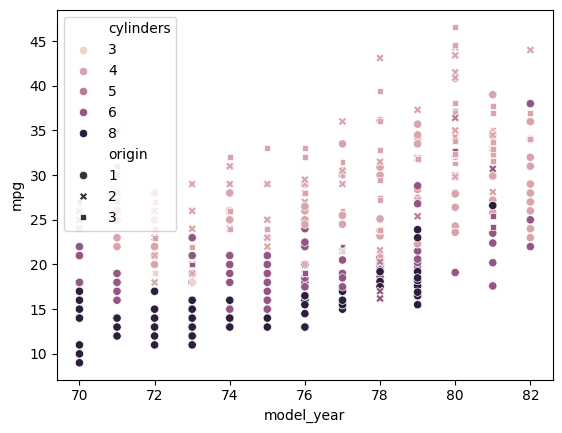

In [22]:
sns.scatterplot(data=df, x="model_year", y="mpg", hue="cylinders" , style="origin")
plt.show()

### Data Preprocessing

In [23]:


for col in col_num:
    fig = px.box(df, y=col, title=f'Boxplot of {col}')
    fig.update_layout(
    autosize=False,
    width=700,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    )
    fig.show()


In [24]:
#remove outlier 
for col in col_num:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    

In [25]:

for col in col_num:
    fig = px.box(df, y=col, title=f'Boxplot of {col}')
    fig.update_layout(
    autosize=False,
    width=700,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    )
    fig.show()


### Model Building

### Regreesion

In [26]:
data = df.to_numpy()
df.shape

(378, 8)

In [27]:
#target mpg 
X = data[:,0:7]
y = data[:,7].reshape((-1,1))


In [28]:
X.shape

(378, 7)

In [29]:
y.shape

(378, 1)

In [30]:
y

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [15. ],
       [15. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17. ],
       [13. ],
       [12. ],
       [13. ],
       [19. ],
       [15. ],
       [13. ],
       [13. ],
       [14. ],
       [18. ],
       [22

In [31]:
X_scaled = (X - np.mean(X, axis=0))/(np.max(X, axis=0) - np.min(X, axis=0))
X_scaled[:5]

array([[ 0.33095531,  0.52328042,  0.1867722 ,  0.16153768, -0.28600823,
        -0.51212522, -0.29365079],
       [ 0.45006889,  0.52328042,  0.41703536,  0.21512429, -0.32569077,
        -0.51212522, -0.29365079],
       [ 0.36142623,  0.52328042,  0.31835115,  0.14225784, -0.36537331,
        -0.51212522, -0.29365079],
       [ 0.32264506,  0.52328042,  0.31835115,  0.14140725, -0.28600823,
        -0.51212522, -0.29365079],
       [ 0.3171049 ,  0.52328042,  0.25256168,  0.14594369, -0.40505585,
        -0.51212522, -0.29365079]])

In [32]:
one = np.ones((len(X), 1))
X_new = np.concatenate((one, X_scaled), axis=1)
X_new[:5]

array([[ 1.        ,  0.33095531,  0.52328042,  0.1867722 ,  0.16153768,
        -0.28600823, -0.51212522, -0.29365079],
       [ 1.        ,  0.45006889,  0.52328042,  0.41703536,  0.21512429,
        -0.32569077, -0.51212522, -0.29365079],
       [ 1.        ,  0.36142623,  0.52328042,  0.31835115,  0.14225784,
        -0.36537331, -0.51212522, -0.29365079],
       [ 1.        ,  0.32264506,  0.52328042,  0.31835115,  0.14140725,
        -0.28600823, -0.51212522, -0.29365079],
       [ 1.        ,  0.3171049 ,  0.52328042,  0.25256168,  0.14594369,
        -0.40505585, -0.51212522, -0.29365079]])

In [33]:
def hyp(X, theta):
  '''
  X: array (m, n)
  theta: array (n, 1)
  return y: array (m, 1)
  '''
  y = np.matmul(X, theta)
  return y

def cost_funct(y_predict, y_actual):
  cost = ((y_predict - y_actual)**2).mean()
  return cost

def grad(X, y_predict, y_actual):
  '''
  X: array (m, n)
  X.T: array (n, m)
  y_predict, y_actual: array (m, 1)
  '''
  g =(2/len(X))*np.matmul(X.transpose(), y_predict - y_actual)
  return g

In [34]:
theta = np.random.rand(X_new.shape[1], 1)
alpha = 0.1
num_epochs = 1000
cost_list = []
for epoch in range(1, num_epochs+1):
  y_predict = hyp(X_new, theta)
  cost = cost_funct(y_predict, y)
  cost_list.append(cost)

  # update weights
  theta = theta - alpha*grad(X_new, y_predict, y)

  if epoch%10==0:
    print(f'Epoch: {epoch:02d}: Cost = {cost:0.4f}')

Epoch: 10: Cost = 36.8754
Epoch: 20: Cost = 17.5282
Epoch: 30: Cost = 14.7201
Epoch: 40: Cost = 13.7558
Epoch: 50: Cost = 13.2637
Epoch: 60: Cost = 12.9377
Epoch: 70: Cost = 12.6926
Epoch: 80: Cost = 12.4974
Epoch: 90: Cost = 12.3366
Epoch: 100: Cost = 12.2009
Epoch: 110: Cost = 12.0840
Epoch: 120: Cost = 11.9813
Epoch: 130: Cost = 11.8898
Epoch: 140: Cost = 11.8073
Epoch: 150: Cost = 11.7320
Epoch: 160: Cost = 11.6628
Epoch: 170: Cost = 11.5987
Epoch: 180: Cost = 11.5390
Epoch: 190: Cost = 11.4831
Epoch: 200: Cost = 11.4307
Epoch: 210: Cost = 11.3812
Epoch: 220: Cost = 11.3346
Epoch: 230: Cost = 11.2904
Epoch: 240: Cost = 11.2485
Epoch: 250: Cost = 11.2087
Epoch: 260: Cost = 11.1709
Epoch: 270: Cost = 11.1349
Epoch: 280: Cost = 11.1005
Epoch: 290: Cost = 11.0678
Epoch: 300: Cost = 11.0365
Epoch: 310: Cost = 11.0065
Epoch: 320: Cost = 10.9779
Epoch: 330: Cost = 10.9505
Epoch: 340: Cost = 10.9242
Epoch: 350: Cost = 10.8990
Epoch: 360: Cost = 10.8748
Epoch: 370: Cost = 10.8516
Epoch: 380

In [35]:
data = {"Epoch": range(1, num_epochs + 1), "Cost": cost_list}
df = pd.DataFrame(data)
# Plot using Plotly Express
fig = px.line(df, x="Epoch", y="Cost", title="Cost vs Epoch", labels={"Epoch": "Epoch", "Cost": "Cost"})
fig.update_layout(
    autosize=False,
    width=700,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)
fig.show()

In [36]:

for i in range(len(y)):
  print(tabulate([np.concatenate((y_predict[i].tolist(), y[i].tolist()),axis=0)], headers=["Predicted", "Actual"], tablefmt="fancy_grid"))


╒═════════════╤══════════╕
│   Predicted │   Actual │
╞═════════════╪══════════╡
│      15.207 │       18 │
╘═════════════╧══════════╛
╒═════════════╤══════════╕
│   Predicted │   Actual │
╞═════════════╪══════════╡
│     12.7144 │       15 │
╘═════════════╧══════════╛
╒═════════════╤══════════╕
│   Predicted │   Actual │
╞═════════════╪══════════╡
│     14.7151 │       18 │
╘═════════════╧══════════╛
╒═════════════╤══════════╕
│   Predicted │   Actual │
╞═════════════╪══════════╡
│     14.5742 │       16 │
╘═════════════╧══════════╛
╒═════════════╤══════════╕
│   Predicted │   Actual │
╞═════════════╪══════════╡
│     15.3125 │       17 │
╘═════════════╧══════════╛
╒═════════════╤══════════╕
│   Predicted │   Actual │
╞═════════════╪══════════╡
│      8.5042 │       15 │
╘═════════════╧══════════╛
╒═════════════╤══════════╕
│   Predicted │   Actual │
╞═════════════╪══════════╡
│     13.1823 │       15 │
╘═════════════╧══════════╛
╒═════════════╤══════════╕
│   Predicted │   Actual │
╞

In [37]:
#print accuaracy

def r2_score(y_predict, y_actual):
    ss_res = ((y_actual - y_predict)**2).sum()
    ss_tot = ((y_actual - y_actual.mean())**2).sum()
    r2 = 1 - (ss_res/ss_tot)
    return r2
y_predict = hyp(X_new, theta)
r2 = r2_score(y_predict, y)
print(f"Accuracy: {r2:0.4f}")


Accuracy: 0.8183


In [38]:
#test on new data to predict
X_test = np.array([307,8,130,3504,12,70,1]).reshape(1, -1)
X_test_scaled = (X_test - np.mean(X, axis=0))/(np.max(X, axis=0) - np.min(X, axis=0))
X_test_new = np.concatenate((np.ones((1, 1)), X_test_scaled), axis=1)
y_predict = hyp(X_test_new, theta)
print(f"Predicted mpg: {y_predict[0][0]:0.2f}")


Predicted mpg: 15.21


In [38]:
#save model above for use streamlit
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(theta, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump((np.mean(X, axis=0), np.max(X, axis=0), np.min(X, axis=0)), f)

#load model
with open("model.pkl", "rb") as f:
    theta = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    mean, max_, min_ = pickle.load(f)




    

In [40]:
#streamlit app
import streamlit as st
import pickle
import numpy as np

st.title("Auto MPG Prediction")
st.write("This is a simple app to predict the MPG of a car")

# Load the model
with open("model.pkl", "rb") as f:
    theta = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    mean, max_, min_ = pickle.load(f)

# Input form
cylinders = st.slider("Cylinders", 3, 8, 4)
displacement = st.slider("Displacement", 68, 455, 200)
horsepower = st.slider("Horsepower", 46, 230, 100)
weight = st.slider("Weight", 1613, 5140, 3000)
acceleration = st.slider("Acceleration", 8, 24, 15)
model_year = st.slider("Model Year", 70, 82, 76)
origin = st.slider("Origin", 1, 3, 1)

X_test = np.array([displacement, cylinders, horsepower, weight, acceleration, model_year, origin]).reshape(1, -1)
X_test_scaled = (X_test - mean)/(max_ - min_)
X_test_new = np.concatenate((np.ones((1, 1)), X_test_scaled), axis=1)
y_predict = np.matmul(X_test_new, theta)
st.write(f"Predicted MPG: {y_predict[0][0]:0.2f}")



FileNotFoundError: [Errno 2] No such file or directory: 'model_parameters.pkl'